In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

Consider the function f(x) = cos(pix/2) on [-1, 1], repeat the numerical experiments for n = 3, 6, 12 (n is the degree of the interpolating polynomial)

repeat the experiment!

In [2]:
n_values = [3, 6, 12]

In [3]:
def my_langrange(x, y, x_val):
    '''
        x: list of x values
        y: list of y values
        x_val: point to evaluate
    '''
    n = len(x) #get the length of x values
    y_val = 0
    for i in range(n):
        l = 1
        for j in range(n):
            if i != j:
                l *= (x_val - x[j]) / (x[i] - x[j]) #calculate the lagrange polynomial
        y_val += l * y[i] #evaluate the lagrange polynomial
    return y_val

In [4]:
def newton_divided_difference(x, y):
    '''
    Calculates the coefficients of the Newton polynomial using divided differences.

    x: list of x values
    y: list of y values
    Returns: list of coefficients of the polynomial
    '''
    n = len(x)
    F = np.zeros((n, n))
    for i in range(n):
        F[i][0] = y[i]
    for i in range(1, n):
        for j in range(1, i + 1):
            F[i][j] = (F[i][j - 1] - F[i - 1][j - 1]) / (x[i] - x[i - j])
    co_eff = [F[i][i] for i in range(n)]
    return co_eff


def newton_polynomial(co_eff, x_values, x):
    '''
    Evaluates the Newton polynomial at a given x.

    co_eff: coefficients of the Newton polynomial
    x_values: original x values used to generate the polynomial
    x: point at which to evaluate the polynomial
    Returns: y value at the given x
    '''
    n = len(x_values)
    result = co_eff[0]
    for i in range(1, n):
        term = co_eff[i]
        for j in range(i):
            term *= (x - x_values[j])
        result += term
    return result

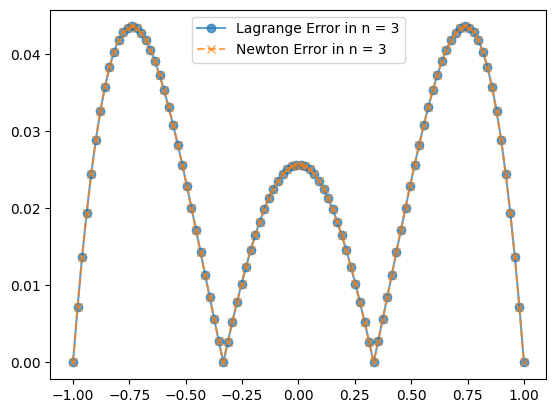

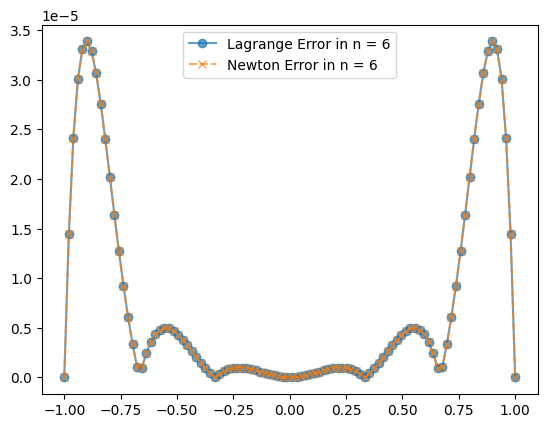

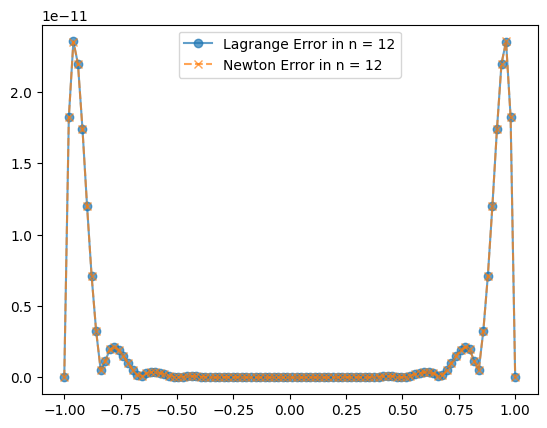

<Figure size 640x480 with 0 Axes>

In [5]:
for n in n_values:
    lagrange_errors = []
    newton_errors = []
    x_points = np.linspace(-1, 1, n + 1)
    x_eval_points = np.linspace(-1, 1, 100)
    y_points = [np.cos(np.pi * x / 2) for x in x_points]
    y_eval_points = [np.cos(np.pi * x / 2) for x in x_eval_points]
    lagrange_y_points = [my_langrange(x_points, y_points, x) for x in x_eval_points]
    newton_co_eff = newton_divided_difference(x_points, y_points)
    # newton_y_points = [my_horner_poly_eval(newton_co_eff, x) for x in x_points]
    newton_y_points = [newton_polynomial(newton_co_eff, x_points, x) for x in x_eval_points]
    for i in range(len(y_eval_points)):
        lagrange_errors.append(np.linalg.norm(y_eval_points[i] - lagrange_y_points[i])) #calculate the norm error and store it in the array for each n
        newton_errors.append(np.linalg.norm(y_eval_points[i] - newton_y_points[i])) #calculate the norm error and store it in the array for each n
    plt.plot(x_eval_points, lagrange_errors, label='Lagrange Error in n = {}'.format(n), linestyle='-', marker='o',
             alpha=0.7)
    plt.plot(x_eval_points, newton_errors, label='Newton Error in n = {}'.format(n), linestyle='--', marker='x', alpha=0.7)
    plt.legend()
    plt.show()
    plt.savefig('error_plot_{}.png'.format(n))
    plt.clf()

Use uniform nodes and Newton's divided differnce to construct the interpolating polynomial

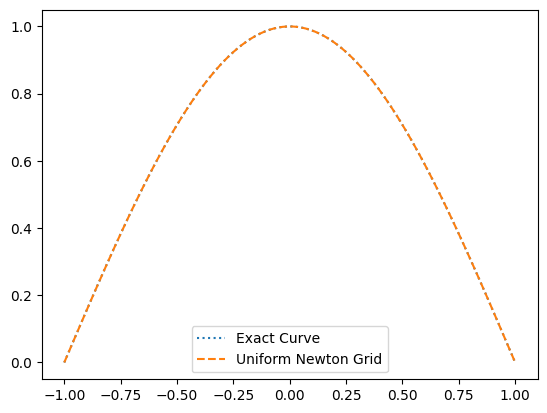

<Figure size 640x480 with 0 Axes>

In [6]:
uniform_n = 10
uniform_x_points = np.linspace(-1, 1, uniform_n + 1)
uniform_y_points = [np.cos(np.pi * x / 2) for x in uniform_x_points]
x_eval_points = np.linspace(-1, 1, 100)
y_eval_points = [np.cos(np.pi * x / 2) for x in x_eval_points]
uniform_newton_co_eff = newton_divided_difference(uniform_x_points, uniform_y_points)
uniform_newton_y_points = [newton_polynomial(uniform_newton_co_eff, uniform_x_points, x) for x in x_eval_points]
# uniform_newton_y_points = [my_horner_poly_eval(uniform_newton_co_eff, x) for x in uniform_x_points]
plt.plot(x_eval_points, y_eval_points, label='Exact Curve', linestyle=':')
plt.plot(x_eval_points, uniform_newton_y_points, label='Uniform Newton Grid', linestyle='--')
plt.legend()
plt.show()
plt.savefig('uniform_newton_grid.png')
plt.clf()

use chebyshev nodes type 1 and type 2 to plot the error upper bound for each method, and in comparison, the actual error. (interval [-1, 1])


In [7]:
def chebyshev_nodes_type1(n):
    return np.cos(np.pi * np.arange(n + 1) / n)

# Chebyshev node type of 2 kind
def chebyshev_nodes_type2(n):
    return np.cos(np.pi * (2 * np.arange(n + 1) + 1) / (2 * (n + 1)))

# Chebyshev upper bound error calculation
def upper_bound_error(n):
    return (2 ** (-n) * (np.pi / 2) ** (n + 1)) / math.factorial(n + 1)

In [8]:
def newton_divided_difference(x_nodes, y_nodes, x):
    '''
    x_nodes: list of x values (nodes)
    y_nodes: list of y values (function values at x_nodes)
    x: the point at which to evaluate the interpolating polynomial
    '''
    n = len(x_nodes)  # Get the length of x values
    newton_matrix = np.zeros((n, n))  # Initialize the divided difference matrix (n x n matrix)

    # Fill in the first column with y values
    for i in range(n):
        newton_matrix[i][0] = y_nodes[i]

    # Calculate the divided differences
    for i in range(1, n):
        for j in range(1, i + 1):
            newton_matrix[i][j] = (newton_matrix[i][j - 1] - newton_matrix[i - 1][j - 1]) / (x_nodes[i] - x_nodes[i - j])

    # Get the coefficients of the polynomial (diagonal elements)
    co_eff = [newton_matrix[i][i] for i in range(n)]

    # Calculate the interpolating polynomial at the point x
    result = co_eff[0]  # Start with the first coefficient
    product_term = 1.0  # Initialize the product term for higher order terms

    for j in range(1, n):
        product_term *= (x - x_nodes[j - 1])  # Calculate the product term (x - x_nodes[i])
        result += co_eff[j] * product_term  # Add the term to the result

    return result #return the evaluated result

In [9]:
#upper bound error for chebyshev node type 1
#1/(n+1)!*(pi/2)^(n+1)*(x - x0)(x- x1)…
def chebyshev_node_1_upper_bound_error(n, x, x_nodes):
    """
    Calculate the upper bound error for Chebyshev nodes of type 1.

    n: degree of the interpolating polynomial
    x: point at which to evaluate the error
    x_nodes: Chebyshev nodes of type 1
    Returns: upper bound error
    """
    product_term = np.prod([x - x_i for x_i in x_nodes])
    upper_bound = np.abs((1 / math.factorial(n + 1)) * (np.pi / 2) ** (n + 1) * product_term)
    return upper_bound

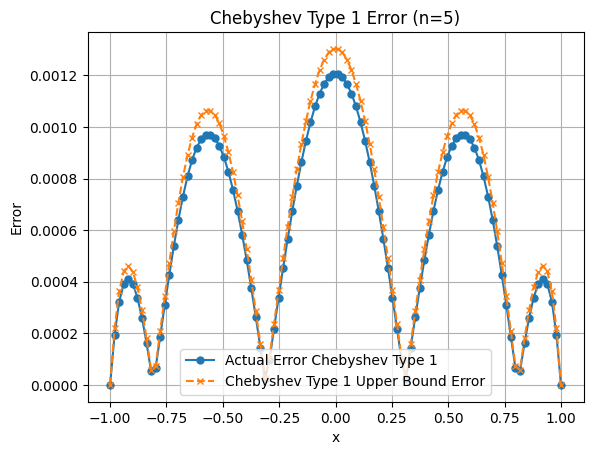

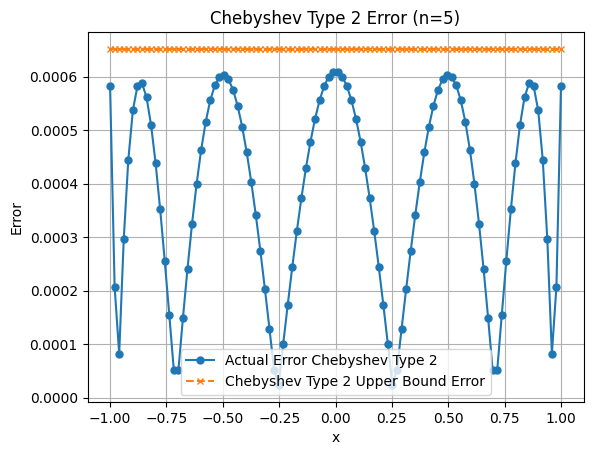

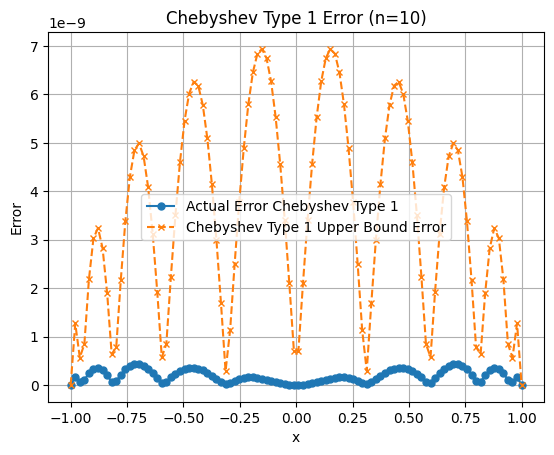

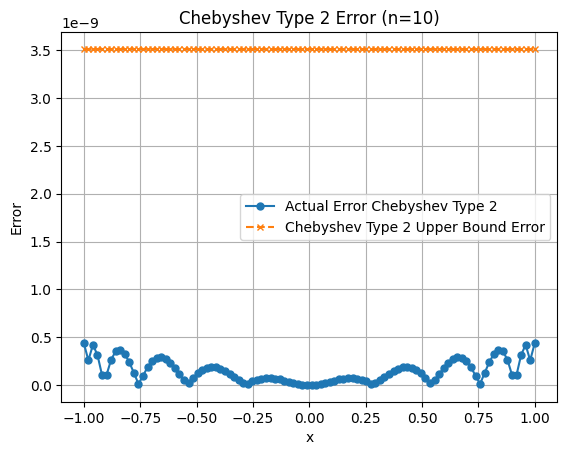

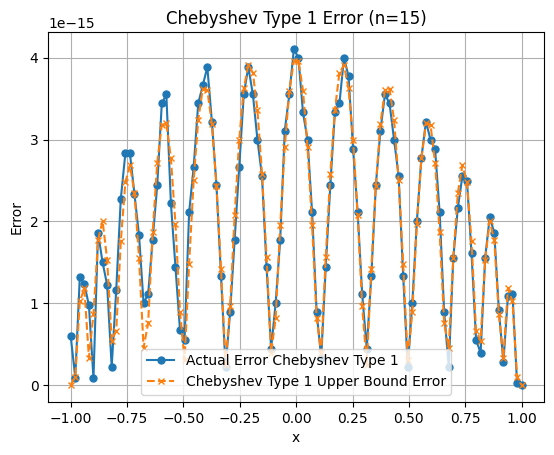

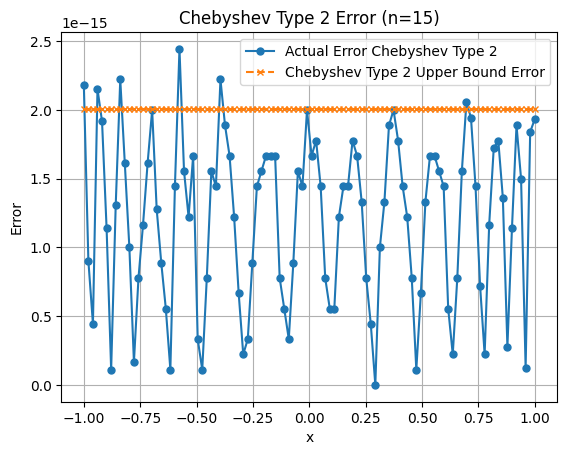

<Figure size 640x480 with 0 Axes>

In [10]:
n_values = [5, 10, 15]
x_eval_nodes = np.linspace(-1, 1, 100)
y_eval_points = [np.cos((np.pi * x) / 2) for x in x_eval_nodes]
for n in n_values:
    x_node_type_1 = chebyshev_nodes_type1(n)
    y_node_type_1 = [np.cos((np.pi * x) / 2) for x in x_node_type_1]

    x_node_type_2 = chebyshev_nodes_type2(n)
    y_node_type_2 = [np.cos((np.pi * x) / 2) for x in x_node_type_2]

    # Calculate the upper bound.
    # Calculate this again.
    # type_1_upper_error = [upper_bound_error(n)] * len(x_eval_nodes) #type-1 error는 다른 것이다. 직접 x - xi를 계산할 것!
    type_1_upper_error = [chebyshev_node_1_upper_bound_error(n, x, x_node_type_1) for x in x_eval_nodes]
    type_2_upper_error = [upper_bound_error(n)] * len(x_eval_nodes)

    # Newton's Divided Difference 사용
    newton_y_node_type_1 = [newton_divided_difference(x_node_type_1, y_node_type_1, x) for x in x_eval_nodes]
    newton_y_node_type_2 = [newton_divided_difference(x_node_type_2, y_node_type_2, x) for x in x_eval_nodes]

    # 실제 오차 계산
    actual_error_type_1 = [np.abs(y_eval_points[i] - newton_y_node_type_1[i]) for i in range(len(y_eval_points))]
    actual_error_type_2 = [np.abs(y_eval_points[i] - newton_y_node_type_2[i]) for i in range(len(y_eval_points))]

    # 결과 플롯
    plt.plot(x_eval_nodes, actual_error_type_1, label='Actual Error Chebyshev Type 1', marker='o', linestyle='-',
             markersize=5)
    plt.plot(x_eval_nodes, type_1_upper_error, label='Chebyshev Type 1 Upper Bound Error', marker='x', linestyle='--',
             markersize=5)
    plt.legend()
    plt.grid(True)
    plt.title(f'Chebyshev Type 1 Error (n={n})')
    plt.xlabel('x')
    plt.ylabel('Error')
    plt.savefig(f'chebyshev_type_1_error_n_{n}.png')
    plt.show()
    plt.clf()

    plt.plot(x_eval_nodes, actual_error_type_2, label='Actual Error Chebyshev Type 2', marker='o', linestyle='-',
             markersize=5)
    plt.plot(x_eval_nodes, type_2_upper_error, label='Chebyshev Type 2 Upper Bound Error', marker='x', linestyle='--',
             markersize=5)
    plt.legend()
    plt.grid(True)
    plt.title(f'Chebyshev Type 2 Error (n={n})')
    plt.xlabel('x')
    plt.ylabel('Error')
    plt.savefig(f'chebyshev_type_2_error_n_{n}.png')
    plt.show()
    plt.clf()

Briefly state your finding.
- The upper bound error for Chebyshev Type 1 effectively covers the actual error, demonstrating significant oscillations that are, however, well-bounded.
- For Chebyshev Type 2, the upper bound is highly stable, and consistently higher than the actual error by a significant margin.
- The upper bound errors maintaining higher values and stable limits confirm their reliability in encapsulating the actual error across different scenarios.

In conclusion, these findings reinforce the reliability of upper bound errors in Chebyshev polynomials, ensuring that the actual errors, despite their oscillations, stay within predictable and safe limits. This is an encouraging result for applications where precision and stringent error bounds are imperative.

The primary reason for the inaccuracies observed when \( n = 15 \) is due to computational errors. Therefore, it is reasonable to consider that increasing the precision of floating-point arithmetic could potentially reduce these errors and narrow the margin of inaccuracies.